# Correlated Random Number Generation


https://myfinancialmarkets.club/2018/01/06/how-to-generate-correlated-assets-and-why/


https://www.mathworks.com/matlabcentral/answers/372572-how-to-implement-a-correlated-brownian-motion-correctly


http://www.goddardconsulting.ca/matlab-monte-carlo-assetpaths-corr.html


http://www2.maths.ox.ac.uk/~gilesm/mc/nanjing/giles_lecs-2x2.pdf


https://wwwf.imperial.ac.uk/~ajacquie/index_files/JJ%20-%20PathsCorrelation.pdf


https://quantessence.files.wordpress.com/2012/01/multibrownianmotion.pdf

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 

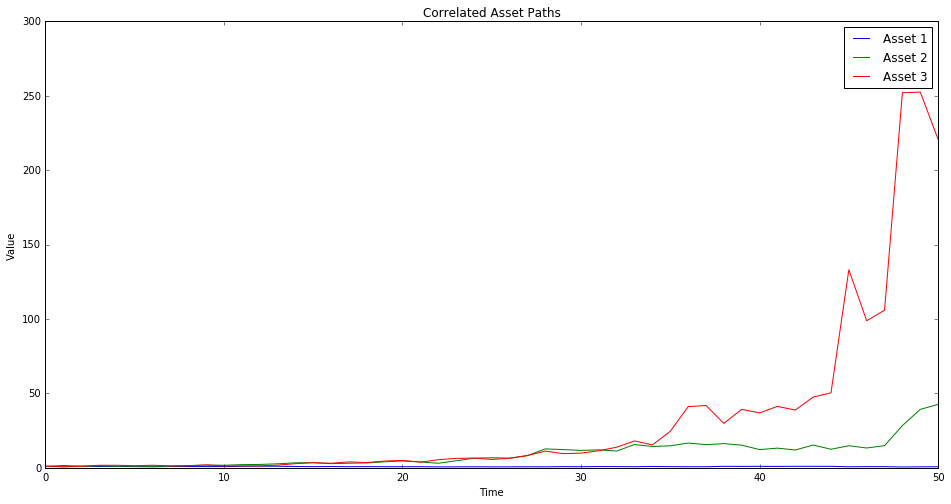

In [7]:
# Use Cholesky decomposition on covariance matrix
cov = np.array([[1,-0.5,-0.8],[-0.5,1,0.6],[-0.8,0.6,1]])
chol = np.linalg.cholesky(cov)

# Generate stock parameters
S = np.array([[1,1,1]])
drift = np.array([0.05,0.06,0.07])
vol = np.array([0.15,0.2,0.3])

# Generate correlated random movements
assets = len(cov[0])
timesteps = 50
x = np.random.normal(size=(assets,timesteps))
z = np.transpose(np.matmul(chol,x))

# Calculate stock movements with GBM
for i in range(timesteps):
#     print drift
#     print 0.5*np.square(vol)
#     print np.multiply(vol,z[i])
#     print np.exp( (drift - 0.5*np.square(vol)) + np.multiply(vol,z[i]) )
    S = np.vstack([S, S[i] * np.exp( (drift - 0.5*np.square(vol)) + np.multiply(vol,z[i]) )])
#     break
    
plt.figure(figsize=(16,8))
plt.plot(S)
plt.title('Correlated Asset Paths')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Asset 1','Asset 2','Asset 3'])
plt.show()

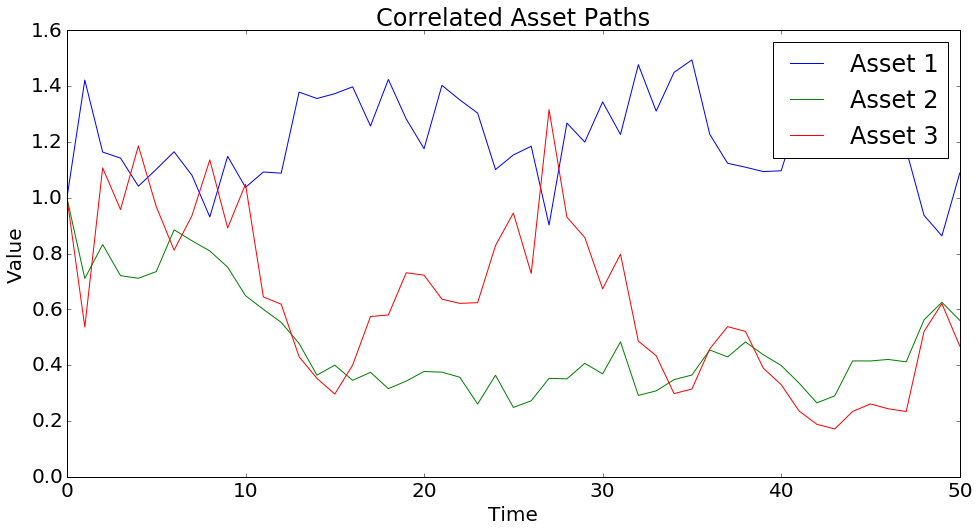

In [9]:
    
plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size': 20})
plt.plot(S)
plt.title('Correlated Asset Paths')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Asset 1','Asset 2','Asset 3'])
plt.show()

In [8]:
cov

array([[ 1. , -0.5, -0.8],
       [-0.5,  1. ,  0.6],
       [-0.8,  0.6,  1. ]])